<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/EDA_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Originalmente, en el dataset heart-disease from kaggle (https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data) estaban presentes los siguientes datos:


### **Descripción de variables**

- Age: La edad del individuo. +

- Gender: El género del individuo (Masculino o Femenino). +

- Blood Pressure: La presión arterial del individuo (sistólica). +

- Cholesterol Level: El nivel total de colesterol del individuo. +

- Exercise Habits: Los hábitos de ejercicio del individuo (Bajo, Medio, Alto). +

- Smoking: Si el individuo fuma o no (Sí o No). +

- Family Heart Disease: Si hay antecedentes familiares de enfermedad cardíaca (Sí o No). +

- Diabetes: Si el individuo tiene diabetes (Sí o No). +

- BMI: El índice de masa corporal del individuo. +

- High Blood Pressure: Si el individuo tiene presión arterial alta (Sí o No). +

- Low HDL Cholesterol: Si el individuo tiene colesterol HDL bajo (Sí o No). +

- High LDL Cholesterol: Si el individuo tiene colesterol LDL alto (Sí o No). +

- Alcohol Consumption: El nivel de consumo de alcohol del individuo (Ninguno, Bajo, Medio, Alto). +

- Stress Level: El nivel de estrés del individuo (Bajo, Medio, Alto).

- Sleep Hours: La cantidad de horas que duerme el individuo. +

- Sugar Consumption: El nivel de consumo de azúcar del individuo (Bajo, Medio, Alto). +

- Triglyceride Level: El nivel de triglicéridos del individuo. +

- Fasting Blood Sugar: El nivel de glucosa en sangre en ayunas del individuo. +

- CRP Level: El nivel de proteína C reactiva (un marcador de inflamación). +

- Homocysteine Level: El nivel de homocisteína del individuo (un aminoácido que afecta la salud de los vasos sanguíneos). (posiblemente presente en otros períodos de NHANES)

- Heart Disease Status: El estado de la enfermedad cardíaca del individuo (Sí o No).+

### **Nuevo dataset encontrado**

In [122]:
path = "/content/drive/MyDrive/NHANES"
import os
os.listdir(path)


['demographics.csv',
 'laboratory.csv',
 'dietary.csv',
 'examination.csv',
 'questionnaire.csv',
 '2015-2016',
 '2013-2014']

DATASET: https://www.kaggle.com/datasets/rileyzurrin/national-health-and-nutrition-exam-survey-2017-2018

Los datos se obtienen de la Encuesta Nacional de Examen de Salud y Nutrición (NHANES) en EEUU.

NHANES: https://wwwn.cdc.gov/nchs/nhanes/


Los datos tomados para las siguientes pruebas son del período 2017-2018. Se podría analizar la posibilidad de tomar más períodos, siempre y cuando en esos periodos se hayan recolectado todos los datos necesarios para el proyecto. También en caso de que hubiera muchos faltantes en el período 2017-2018.

Los datos se cargan em archivos por separado. Son datos demográficos, de laboratorio, mediciones físicas, exámenes médicos y de alimentación de distintos pacientes indentificados con un ID llamado SEQN.

In [123]:
#Librerias
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [124]:
df_demo = pd.read_csv(f"{path}/demographics.csv")
df_lab  = pd.read_csv(f"{path}/laboratory.csv")
df_exam = pd.read_csv(f"{path}/examination.csv")
df_diet = pd.read_csv(f"{path}/dietary.csv")
df_quest= pd.read_csv(f"{path}/questionnaire.csv")


In [125]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, "SEQN" in df.columns)


demo True
lab True
exam True
diet True
quest True


In [126]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df.shape)


demo (9254, 46)
lab (8366, 386)
exam (8704, 490)
diet (9254, 362)
quest (9254, 956)


In [127]:
for name, df in {
    "demo": df_demo,
    "lab": df_lab,
    "exam": df_exam,
    "diet": df_diet,
    "quest": df_quest
}.items():
    print(name, df["SEQN"].nunique(), "personas únicas")


demo 9254 personas únicas
lab 8366 personas únicas
exam 8704 personas únicas
diet 9254 personas únicas
quest 9254 personas únicas


In [128]:
df = df_demo.merge(df_lab,  on="SEQN", how="left")
df = df.merge(df_exam, on="SEQN", how="left")
df = df.merge(df_diet, on="SEQN", how="left")
df = df.merge(df_quest,on="SEQN", how="left")

df.shape


(9254, 2236)

In [129]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190,WHQ200,WHQ030M,WHQ500,WHQ520
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,150.0,130.0,63.0,170.0,62.0,2.0,NaN,NaN,NaN,NaN
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,...,NaN,NaN,NaN,150.0,17.0,2.0,NaN,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,2.0


el dataset posee 2236 columnas. Las variables estan etiquetadas por codigos cuya descripcion se encuentra en la documentacion oficial del nhanes.

In [130]:
df["SEQN"].nunique()


9254

In [131]:
df.isnull().mean().sort_values(ascending=False).head(30)


,0
BMIHEAD,1.000000
OSQ040CE,0.999892
HIQ031AA,0.999892
OSD030CE,0.999892
OSD050CC,0.999892
OSD050CE,0.999892
MCQ230D,0.999892
OSQ100J,0.999892
OSD110J,0.999892
SMQ665B,0.999892


primera limpieza: se eliminan columnas con faltantes de mas del 80%

In [132]:
threshold = 0.80
missing_ratio = df.isnull().mean()

cols_to_drop = missing_ratio[missing_ratio > threshold].index
len(cols_to_drop)

801

In [133]:
df_clean = df.drop(columns=cols_to_drop)
df_clean.shape


(9254, 1435)

In [134]:
df_clean.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHQ040,WHD050,WHQ070,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190
0,93703.0,10.0,2.0,2.0,2.0,5.0,6.0,2.0,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,10.0,2.0,1.0,2.0,3.0,3.0,1.0,33.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,10.0,2.0,2.0,66.0,4.0,4.0,2.0,NaN,2.0,...,3.0,165.0,2.0,4.0,150.0,130.0,63.0,170.0,62.0,2.0
3,93706.0,10.0,2.0,1.0,18.0,5.0,6.0,2.0,222.0,2.0,...,3.0,145.0,2.0,5.0,NaN,NaN,NaN,150.0,17.0,2.0
4,93707.0,10.0,2.0,1.0,13.0,5.0,7.0,2.0,158.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
"SEQN" in df_clean.columns


True

mayores de 18

In [136]:
df_clean = df_clean[df_clean["RIDAGEYR"] >= 18]
df_clean.shape


(5856, 1435)

Armado de target

Se toman 4 valores:

"MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?"

"MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?"

"MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?"

"MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?"

In [137]:
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

valores de esas columnas.

Significados:

1- si
2 - no
7 - no quizo contestar
9 - no sabe


In [138]:
for col in cvd_cols:
    print(f"Valores en {col}:")
    print(df_clean[col].value_counts(dropna=False))
    print("-"*30)

Valores en MCQ160B:
MCQ160B
2.0    5351
NaN     287
1.0     201
9.0      17
Name: count, dtype: int64
------------------------------
Valores en MCQ160C:
MCQ160C
2.0    5288
NaN     287
1.0     265
9.0      16
Name: count, dtype: int64
------------------------------
Valores en MCQ160D:
MCQ160D
2.0    5378
NaN     287
1.0     161
9.0      30
Name: count, dtype: int64
------------------------------
Valores en MCQ160E:
MCQ160E
2.0    5289
NaN     287
1.0     270
9.0      10
Name: count, dtype: int64
------------------------------


como se ve, algunos encuestados no saben si tienen algunas de esas patologias. Son muy pocos. por lo tanto, los elimino.Tambien se eliminan los que tienen faltantes, ya que al tratarse del target,se necesitan datos confiables.

In [139]:
import numpy as np

# Reemplazar 9 por NaN (no sabe)
df_clean[cvd_cols] = df_clean[cvd_cols].replace(9, np.nan)

# Eliminar filas donde no hay info en ninguna columna de CVD
df_clean = df_clean[df_clean[cvd_cols].notna().any(axis=1)]

# Crear target binario
df_clean["alto_riesgo"] = (df_clean[cvd_cols] == 1).any(axis=1).astype(int) ## si respondió si en alguna de las variables, se codifica como que si posee enfermedad cardiovascular

# Verificar distribución
print(df_clean["alto_riesgo"].value_counts())



alto_riesgo
0    5041
1     527
Name: count, dtype: int64


In [140]:
df_clean.shape

(5568, 1436)

Aún se tiene una buena cantidad de datos

In [141]:
df_clean.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHD050,WHQ070,WHQ225,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ190,alto_riesgo
2,93705.0,10.0,2.0,2.0,66.0,4.0,4.0,2.0,NaN,2.0,...,165.0,2.0,4.0,150.0,130.0,63.0,170.0,62.0,2.0,0
5,93708.0,10.0,2.0,2.0,66.0,5.0,6.0,2.0,NaN,2.0,...,118.0,2.0,5.0,118.0,100.0,60.0,120.0,40.0,2.0,0
6,93709.0,10.0,2.0,2.0,75.0,4.0,4.0,1.0,NaN,2.0,...,190.0,2.0,3.0,170.0,160.0,62.0,200.0,50.0,2.0,0
8,93711.0,10.0,2.0,1.0,56.0,5.0,6.0,2.0,NaN,2.0,...,142.0,2.0,5.0,142.0,148.0,69.0,152.0,33.0,2.0,0
10,93713.0,10.0,2.0,1.0,67.0,3.0,3.0,1.0,NaN,1.0,...,168.0,2.0,5.0,190.0,170.0,72.0,195.0,45.0,2.0,0


In [142]:
df_clean["alto_riesgo"].value_counts(normalize=True)


,proportion
alto_riesgo,
0,0.905352
1,0.094648


In [143]:
import pandas as pd

# Diccionario con todas las variables y su significado
nhanes_vars_dict = {
    # "SEQN": "Identificador único del participante",
    "RIDAGEYR": "Edad del participante (años)", # numerica
    "RIAGENDR": "Género (1=Hombre, 2=Mujer)", # binaria
    "BPXSY1": "Presión sistólica, medición 1 (mmHg)", # numerica continua
    "BPXSY2": "Presión sistólica, medición 2 (mmHg)", # numerica continua
    "BPXSY3": "Presión sistólica, medición 3 (mmHg)", # numerica continua
    # "BPXSY4": "Presión sistólica, medición 4 (mmHg)",   YA NO EXISTE EN ESTE PUNTO
    "LBXTC": "Colesterol total (mg/dL)",
    "LBDHDD": "Colesterol HDL (mg/dL)",
    "LBDLDL": "Colesterol LDL (mg/dL)",
    "LBXTR": "Triglicéridos (mg/dL)",
    "LBXGLU": "Glucosa en ayunas (mg/dL)",
    "LBXHSCRP": "Proteína C reactiva de alta sensibilidad (hs-CRP) (mg/dL, marcador de inflamación)",
    ## ------ Para target -----------
    "MCQ160B": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido insuficiencia cardíaca congestiva?",
    "MCQ160C": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido enfermedad coronaria del corazón?",
    "MCQ160D": "¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido angina, también llamada angina de pecho?",
    "MCQ160E":"¿Alguna vez un médico u otro profesional de la salud le ha dicho que usted ha tenido un ataque al corazón (también llamado infarto de miocardio)?",
    ## ------------------------------
    "MCQ300A": "Pariente con enfermedad cardíaca (si ha tenido nu ataque cardíaco o angina)",
    "MCQ300B": "Pariente con asma",
    "MCQ300C": "Pariente con diabetes",
    "DIQ010": "Diabetes declarada por médico",
    "BPQ020": "Diagnóstico de presión arterial alta",
    "BMXBMI": "Índice de masa corporal (kg/m²)",
    "SMQ020": "Fumador en algún momento de la vida",
    "SMQ040": "Fuma actualmente",
    "PAQ605": "Actividad física: caminar/bici últimos 7 días",
    "PAQ620": "Actividad física moderada últimos 7 días",
    "PAQ635": "Actividad física vigorosa últimos 7 días",
    "PAQ650": "Tiempo sentado promedio diario",
    "SLD012": "Horas de sueño promedio por noche",
    "DPQ010": "Pregunta 1 escala depresión -anhedonia",
    "DPQ020": "Pregunta 2 escala depresión",
    # "DPQ030": "Pregunta 3 escala depresión",
    # "DPQ040": "Pregunta 4 escala depresión",
    # "DPQ050": "Pregunta 5 escala depresión",
    # "DPQ060": "Pregunta 6 escala depresión",
    # "DPQ070": "Pregunta 7 escala depresión",
    # "DPQ080": "Pregunta 8 escala depresión",
    # "DPQ090": "Pregunta 9 escala depresión",
    # "ALD020": "A lo largo de tu vida, ¿cuántos días has consumido al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    # "ALD030": "Durante los últimos 30 días, ¿cuántos días consumiste al menos una bebida alcohólica?", YA NO EXISTE EN ESTE PUNTO
    "ALQ130": "Durante los últimos 12 meses, en los días que {usted/SP} consumió bebidas alcohólicas, ¿cuántas copas tomó en promedio? Por copa, se refiere a una cerveza de 355 ml, una copa de vino de 145 ml o una onza y media de licor.",
    "DR1TSUGR": "Consumo de azúcar total del día (gramos)",
    # agregados despues
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "Recodificación de información reportada sobre raza y origen hispano, con categoría de asiático no hispano",
    "BPXDI1" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI2" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXDI3" : "Diastólica: Presión arterial (primera lectura) mm Hg", # numerica continua
    "BPXPULS": "Pulso ¿regular o irregular? (1 -regular, 2- irregular)", # numerica binaria
    "LBXGH" :	"Glicohemoglobina (%)", # numerica
    "LBXHGB":  "Hemoglobina (g/dL)",
    "LBXRDW": "Ancho de distribución de glóbulos rojos (%)",
    "LBXSCR": "Creatinina, suero refrigerado (mg/dL)",
    # "PAQ610": "(Días por semana de actividad intensa en el trabajo)", faltantes
    # AQ625 (días de actividad moderada en el trabajo)
    # AQ640 (días caminando/bicicleta para transporte)
    # PAQ655 (días actividad deportiva vigorosa)
    # "PAQ665": "(actividad deportiva moderada, sí/no)", #se elige paq670
    "PAQ670": "(días actividad deportiva moderada)",
    "DIQ160": "(prediabetes / glucosa alterada)",
    "MCQ160F": "(alguna vez ACV)",
    "BPQ080": "Diagnóstico de colesterol alto",
    # "BPQ100D":"cumplimiento de medicación para colesterol",
    "BPQ090D": "Told to take prescriptn for cholesterol",
    "KIQ022" : "¿Alguna vez le dijeron que tiene riñones débiles o fallando?",
    "ALQ121": "Durante los últimos 12 meses, ¿con qué frecuencia consumiste cualquier tipo de bebida alcohólica? Indica cuántos días por semana, por mes o por año.",
    "ALQ142": "Durante los últimos 12 meses, ¿con qué frecuencia tomaste {DISPLAY NUMBER} o más bebidas alcohólicas en un solo día? Indica cuántos días por semana, por mes o por año.",
    "ALQ170": "Considerando todos los tipos de bebidas alcohólicas, durante los últimos 30 días, ¿cuántas veces tomaste {4/5} o más bebidas en una ocasión?",
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2"


# ALD030 – Durante los últimos 30 días, ¿en cuántos días consumiste al menos una bebida alcohólica?


# ALD040 – Durante los últimos 30 días, ¿en cuántos días consumiste {'4' mujeres, '5' hombres - mostrar número} o más bebidas alcohólicas seguidas, es decir, en un par de horas?

}
#" opcionales
# LBXIN -	Insulina (uU/mL)
# LBXFER - Ferritina (ng/mL)
# "URXCOTT" : "Cotinina (ng/mL)" #si, no hay respuesta clara de tabaquismo
# CDQ001 (Dolor/molestia en el pecho alguna vez) → Opcional / complementaria
# CDQ002 (Dolor al subir cuestas o apurarse) → Opcional / complementaria
# CDQ003 (Dolor al caminar a paso normal) → Opcional / complementaria
# CDQ008 (Dolor intenso >30 min en pecho) → Opcional / relevante si querés preinfarto


In [144]:
variable = 'LBDLDNSI'

if variable in df_clean.columns:
    print("La variable existe")
    print(df_clean[variable].unique())
else:
    print("La variable NO existe")

La variable existe
[  nan 2.87  4.086 3.672 2.043 1.577 2.483 2.534 1.5   2.327 2.405 4.344
 3.155 3.258 9.025 0.647 3.62  4.939 3.491 4.267 0.983 1.474 2.198 2.638
 2.586 2.457 2.896 2.146 3.957 1.448 2.508 4.603 1.733 3.595 1.862 2.974
 4.112 4.293 2.095 2.664 2.741 1.526 2.224 3.284 3.103 3.776 3.129 2.56
 2.069 2.845 5.043 4.06  5.637 2.612 2.948 3.517 2.431 3.931 1.319 1.345
 3.827 3.31  3.077 1.914 4.5   1.552 1.707 1.603 4.551 1.836 4.163 2.767
 4.138 3.207 2.819 1.19  4.008 5.017 3.465 3.75  4.37  1.94  2.353 2.715
 3.388 3.439 3.698 4.577 3.646 1.293 3.181 2.276 1.164 4.732 3.879 3.026
 1.888 2.121 2.25  1.965 2.172 3.    1.267 1.81  2.793 3.543 4.319 2.689
 3.724 1.396 3.569 4.784 3.801 1.009 3.362 6.206 6.025 1.784 3.905 4.991
 3.233 3.336 2.379 4.396 5.896 2.302 1.758 0.853 5.25  3.853 4.888 3.982
 5.56  1.655 5.663 2.017 1.681 4.422 3.414 5.069 5.741 0.828 4.448 0.905
 1.422 5.948 1.371 4.913 1.629 3.051 4.474 2.922 5.405 1.215 1.112 4.758
 4.241 4.215 5.12  5.224 4.189 4.

In [145]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Lista de variables que ppropuestas
selected_vars = list(nhanes_vars_dict.keys())

# Ver cuáles existen realmente en df_clean
existing_vars = [var for var in selected_vars if var in df_clean.columns]


# Features = todas las columnas existentes menos las de CVD y el target ya creado
feature_cols = [col for col in existing_vars if col not in cvd_cols and col != "alto_riesgo"]

print(f"Número de features que vamos a usar: {len(feature_cols)}")
print(feature_cols)


Número de features que vamos a usar: 50
['RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'LBXTC', 'LBDHDD', 'LBDLDL', 'LBXTR', 'LBXGLU', 'LBXHSCRP', 'MCQ300A', 'MCQ300B', 'MCQ300C', 'DIQ010', 'BPQ020', 'BMXBMI', 'SMQ020', 'SMQ040', 'PAQ605', 'PAQ620', 'PAQ635', 'PAQ650', 'SLD012', 'DPQ010', 'DPQ020', 'ALQ130', 'DR1TSUGR', 'RIDRETH3', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXPULS', 'LBXGH', 'LBXHGB', 'LBXRDW', 'LBXSCR', 'PAQ670', 'DIQ160', 'MCQ160F', 'BPQ080', 'BPQ090D', 'KIQ022', 'ALQ121', 'ALQ142', 'ALQ170', 'LBDSTRSI', 'LBDHDDSI', 'LBDGLUSI', 'LBDLDLSI']


In [146]:
# Variables que se eliminaron
removed_vars = [var for var in selected_vars if var not in existing_vars]

print(f"Se eliminaron {len(removed_vars)} variables:")
print(removed_vars)


Se eliminaron 0 variables:
[]


In [147]:
print(df_clean.columns.tolist())


['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'WTSSGP2Y', 'WTSA2YR', 'URXUAS', 'URXUAS3', 'URXUAS5', 'URXUAB', 'URXUAC', 'URXUDMA', 'URXUMMA', 'URDUMMAL', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI', 'LBXTC', 'LBDTCSI', 'URXUCM', 'LBXBCR', 'LBDBCRSI', 'LBXBCO', 'LBDBCOSI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCS

In [148]:
df_clean = df_clean.drop(columns=["SEQN"])


In [149]:
print(df_clean.columns.tolist())

['SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'RIDEXAGM', 'DMQMILIZ', 'DMDBORN4', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA', 'DMDHHSIZ', 'DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGZ', 'DMDHREDZ', 'DMDHRMAZ', 'DMDHSEDZ', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA', 'INDHHIN2', 'INDFMIN2', 'INDFMPIR', 'URXUMA', 'URXUMS', 'URXUCR', 'URXCRS', 'URDACT', 'WTSSGP2Y', 'WTSA2YR', 'URXUAS', 'URXUAS3', 'URXUAS5', 'URXUAB', 'URXUAC', 'URXUDMA', 'URXUMMA', 'URDUMMAL', 'LBDHDD', 'LBDHDDSI', 'WTSAF2YR', 'LBXTR', 'LBDTRSI', 'LBDLDL', 'LBDLDLSI', 'LBDLDLM', 'LBDLDMSI', 'LBDLDLN', 'LBDLDNSI', 'LBXTC', 'LBDTCSI', 'URXUCM', 'LBXBCR', 'LBDBCRSI', 'LBXBCO', 'LBDBCOSI', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT', 'LBXEOPCT', 'LBXBAPCT', 'LBDLYMNO', 'LBDMONO', 'LBDNENO', 'LBDEONO', 'LBDBANO', 'LBXRBCSI', 'LBX

In [150]:
print("Nombre de las variables:")

for i, col in enumerate(df_clean.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. SDDSRVYR
2. RIDSTATR
3. RIAGENDR
4. RIDAGEYR
5. RIDRETH1
6. RIDRETH3
7. RIDEXMON
8. RIDEXAGM
9. DMQMILIZ
10. DMDBORN4
11. DMDCITZN
12. DMDYRSUS
13. DMDEDUC3
14. DMDEDUC2
15. DMDMARTL
16. SIALANG
17. SIAPROXY
18. SIAINTRP
19. FIALANG
20. FIAPROXY
21. FIAINTRP
22. MIALANG
23. MIAPROXY
24. MIAINTRP
25. AIALANGA
26. DMDHHSIZ
27. DMDFMSIZ
28. DMDHHSZA
29. DMDHHSZB
30. DMDHHSZE
31. DMDHRGND
32. DMDHRAGZ
33. DMDHREDZ
34. DMDHRMAZ
35. DMDHSEDZ
36. WTINT2YR
37. WTMEC2YR
38. SDMVPSU
39. SDMVSTRA
40. INDHHIN2
41. INDFMIN2
42. INDFMPIR
43. URXUMA
44. URXUMS
45. URXUCR
46. URXCRS
47. URDACT
48. WTSSGP2Y
49. WTSA2YR
50. URXUAS
51. URXUAS3
52. URXUAS5
53. URXUAB
54. URXUAC
55. URXUDMA
56. URXUMMA
57. URDUMMAL
58. LBDHDD
59. LBDHDDSI
60. WTSAF2YR
61. LBXTR
62. LBDTRSI
63. LBDLDL
64. LBDLDLSI
65. LBDLDLM
66. LBDLDMSI
67. LBDLDLN
68. LBDLDNSI
69. LBXTC
70. LBDTCSI
71. URXUCM
72. LBXBCR
73. LBDBCRSI
74. LBXBCO
75. LBDBCOSI
76. LBXWBCSI
77. LBXLYPCT
78. LBXMOPCT
79. LBXNEPCT
80

In [151]:
# Columnas originales del target
cvd_cols = ["MCQ160B", "MCQ160C", "MCQ160D", "MCQ160E"]

# Crear un DataFrame mínimo que tenga solo las features y el target
df_min = df_clean[feature_cols + ["alto_riesgo"]]

# Verificar
print(df_min.shape)
print(df_min.columns)


(5568, 51)
Index(['RIDAGEYR', 'RIAGENDR', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'LBXTC', 'LBDHDD',
       'LBDLDL', 'LBXTR', 'LBXGLU', 'LBXHSCRP', 'MCQ300A', 'MCQ300B',
       'MCQ300C', 'DIQ010', 'BPQ020', 'BMXBMI', 'SMQ020', 'SMQ040', 'PAQ605',
       'PAQ620', 'PAQ635', 'PAQ650', 'SLD012', 'DPQ010', 'DPQ020', 'ALQ130',
       'DR1TSUGR', 'RIDRETH3', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXPULS',
       'LBXGH', 'LBXHGB', 'LBXRDW', 'LBXSCR', 'PAQ670', 'DIQ160', 'MCQ160F',
       'BPQ080', 'BPQ090D', 'KIQ022', 'ALQ121', 'ALQ142', 'ALQ170', 'LBDSTRSI',
       'LBDHDDSI', 'LBDGLUSI', 'LBDLDLSI', 'alto_riesgo'],
      dtype='object')


In [152]:
# Crear diccionario con los nombres cortos que corresponden solo a tus features
short_names_dict = {
    "RIDAGEYR": "edad",
    "RIAGENDR": "genero",
    "BPXSY1": "presion_sis_1",
    "BPXSY2": "presion_sis_2",
    "BPXSY3": "presion_sis_3",
    "LBXTC": "colesterol_total",
    "LBDHDD": "hdl",
    "LBDLDL": "ldl",
    "LBXTR": "trigliceridos",
    "LBXGLU": "glucosa",
    "LBXHSCRP": "hs_crp",
    "MCQ300A": "fam_cardio",
    "MCQ300B": "fam_asma",
    "MCQ300C": "fam_diabetes",
    "DIQ010": "diabetes",
    "BPQ020": "hipertension",
    "BMXBMI": "bmi",
    "SMQ020": "fumador_hist",
    "SMQ040": "fumador_actual",
    "PAQ605": "act_caminar_bici",
    "PAQ620": "act_moderada",
    "PAQ635": "act_vigorosa",
    "PAQ650": "tiempo_sentado",
    "SLD012": "horas_suenio",
    "DPQ010": "anhedonia",
    "DPQ020": "deprimido_decaido",
    # "DPQ030": "depresion_3",
    # "DPQ040": "depresion_4",
    # "DPQ050": "depresion_5",
    # "DPQ060": "depresion_6",
    # "DPQ070": "depresion_7",
    # "DPQ080": "depresion_8",
    # "DPQ090": "depresion_9",
    "ALQ130": "alcohol_promedio",
    "DR1TSUGR": "azucar_total_dia",
    #
    # "RIDRETH1": "Recodificación de información reportada sobre raza y origen hispano",
    "RIDRETH3": "raza_origen",
    "BPXDI1" : "presion_dis_1",
    "BPXDI2" : "presion_dis_2",
    "BPXDI3" : "presion_dis_3",
    "BPXPULS": "pulso", # numerica binaria
    "LBXGH" :	"glicohemoglobina", # numerica
    "LBXHGB":  "hemoglobina",
    "LBXRDW": "ancho_distribucion_globulos",
    "LBXSCR": "creatinina",
    # "PAQ665": "actividad_deportiva moderada, sí/no)",
    "PAQ670": "actividad_deportiva_moderada_x_semana",
    "DIQ160": "prediabetes_glucosa_alterada",
    "MCQ160F": "ACV",
    "BPQ080": "colesterol_alto",
    "BPQ090D": "medicacion_colesterol",
    "KIQ022" : "riñones_debiles_fallando",
    "ALQ121": "consumo_alcohol_ultimo_año",
    "ALQ142": "consumo_excesivo_alcohol_ultimo_año",
    "ALQ170": "veces_consumo_excesivo_alcohol_30_dias",
    "LBDSTRSI": "trigliceridos_2",
    "LBDHDDSI": "hdl_2",
    "LBDGLUSI": "glucosa_2",
    "LBDLDLSI":"ldl_2"
}


# Filtrar short_names_dict para quedarnos solo con columnas que existen en df_min
# short_names_dict_filtered = {k: v for k, v in short_names_dict.items() if k in df_min.columns}

# Renombrar columnas en df_min
df_min = df_min.rename(columns=short_names_dict)

# Actualizar lista de features con los nombres cortos
feature_cols = [short_names_dict[col] for col in feature_cols if col in short_names_dict]

# Verificar
print("Nuevos nombres de features:")
print(feature_cols)
print("Columnas del DataFrame mínimo renombrado:")
print(df_min.columns)



Nuevos nombres de features:
['edad', 'genero', 'presion_sis_1', 'presion_sis_2', 'presion_sis_3', 'colesterol_total', 'hdl', 'ldl', 'trigliceridos', 'glucosa', 'hs_crp', 'fam_cardio', 'fam_asma', 'fam_diabetes', 'diabetes', 'hipertension', 'bmi', 'fumador_hist', 'fumador_actual', 'act_caminar_bici', 'act_moderada', 'act_vigorosa', 'tiempo_sentado', 'horas_suenio', 'anhedonia', 'deprimido_decaido', 'alcohol_promedio', 'azucar_total_dia', 'raza_origen', 'presion_dis_1', 'presion_dis_2', 'presion_dis_3', 'pulso', 'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina', 'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada', 'ACV', 'colesterol_alto', 'medicacion_colesterol', 'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año', 'consumo_excesivo_alcohol_ultimo_año', 'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2', 'glucosa_2', 'ldl_2']
Columnas del DataFrame mínimo renombrado:
Index(['edad', 'genero', 'presion_sis_1', 'presio

In [153]:
print(df_min.columns)



Index(['edad', 'genero', 'presion_sis_1', 'presion_sis_2', 'presion_sis_3',
       'colesterol_total', 'hdl', 'ldl', 'trigliceridos', 'glucosa', 'hs_crp',
       'fam_cardio', 'fam_asma', 'fam_diabetes', 'diabetes', 'hipertension',
       'bmi', 'fumador_hist', 'fumador_actual', 'act_caminar_bici',
       'act_moderada', 'act_vigorosa', 'tiempo_sentado', 'horas_suenio',
       'anhedonia', 'deprimido_decaido', 'alcohol_promedio',
       'azucar_total_dia', 'raza_origen', 'presion_dis_1', 'presion_dis_2',
       'presion_dis_3', 'pulso', 'glicohemoglobina', 'hemoglobina',
       'ancho_distribucion_globulos', 'creatinina',
       'actividad_deportiva_moderada_x_semana', 'prediabetes_glucosa_alterada',
       'ACV', 'colesterol_alto', 'medicacion_colesterol',
       'riñones_debiles_fallando', 'consumo_alcohol_ultimo_año',
       'consumo_excesivo_alcohol_ultimo_año',
       'veces_consumo_excesivo_alcohol_30_dias', 'trigliceridos_2', 'hdl_2',
       'glucosa_2', 'ldl_2', 'alto_riesgo'],

In [154]:
import pandas as pd

# Lista de variables actuales en df_subset
existing_vars = list(df_min.columns)

# Crear DataFrame con % de faltantes
df_missing = pd.DataFrame({
    "Código NHANES": existing_vars,
    "Significado": [nhanes_vars_dict.get(col, "Variable sin descripción") for col in existing_vars],
    "% Faltantes": [df_min[col].isnull().mean()*100 for col in existing_vars]
})

# Ordenar por % de faltantes
df_missing = df_missing.sort_values("% Faltantes", ascending=False)

# Mostrar
df_missing

,Código NHANES,Significado,% Faltantes
37,actividad_deportiva_moderada_x_semana,Variable sin descripción,60.632184
18,fumador_actual,Variable sin descripción,58.081897
7,ldl,Variable sin descripción,57.471264
49,ldl_2,Variable sin descripción,57.471264
8,trigliceridos,Variable sin descripción,57.022270
9,glucosa,Variable sin descripción,56.267960
48,glucosa_2,Variable sin descripción,56.267960
45,veces_consumo_excesivo_alcohol_30_dias,Variable sin descripción,40.211925
26,alcohol_promedio,Variable sin descripción,40.032328
44,consumo_excesivo_alcohol_ultimo_año,Variable sin descripción,40.032328


In [155]:
print("Nombre de las variables:")

for i, col in enumerate(df_min.columns):
    print(f"{i+1}. {col}")

Nombre de las variables:
1. edad
2. genero
3. presion_sis_1
4. presion_sis_2
5. presion_sis_3
6. colesterol_total
7. hdl
8. ldl
9. trigliceridos
10. glucosa
11. hs_crp
12. fam_cardio
13. fam_asma
14. fam_diabetes
15. diabetes
16. hipertension
17. bmi
18. fumador_hist
19. fumador_actual
20. act_caminar_bici
21. act_moderada
22. act_vigorosa
23. tiempo_sentado
24. horas_suenio
25. anhedonia
26. deprimido_decaido
27. alcohol_promedio
28. azucar_total_dia
29. raza_origen
30. presion_dis_1
31. presion_dis_2
32. presion_dis_3
33. pulso
34. glicohemoglobina
35. hemoglobina
36. ancho_distribucion_globulos
37. creatinina
38. actividad_deportiva_moderada_x_semana
39. prediabetes_glucosa_alterada
40. ACV
41. colesterol_alto
42. medicacion_colesterol
43. riñones_debiles_fallando
44. consumo_alcohol_ultimo_año
45. consumo_excesivo_alcohol_ultimo_año
46. veces_consumo_excesivo_alcohol_30_dias
47. trigliceridos_2
48. hdl_2
49. glucosa_2
50. ldl_2
51. alto_riesgo


### **Tipos de datos de cada variable**


In [156]:
df_min.dtypes

,0
edad,float64
genero,float64
presion_sis_1,float64
presion_sis_2,float64
presion_sis_3,float64
colesterol_total,float64
hdl,float64
ldl,float64
trigliceridos,float64
glucosa,float64


todos son float. En el caso de que se traten de cuestionarios, se encuentran ya con valores numericos de acuerdo a lo que respondió el paciente.

### **Comprobamos si existen observaciones duplicadas**

Se comprueba si hay duplicados por las dudas se encuentre repetidos algunos pacientes.

In [157]:
print("Cantidad de datos duplicados:", df_min.duplicated().sum())

Cantidad de datos duplicados: 0


### **Faltantes**

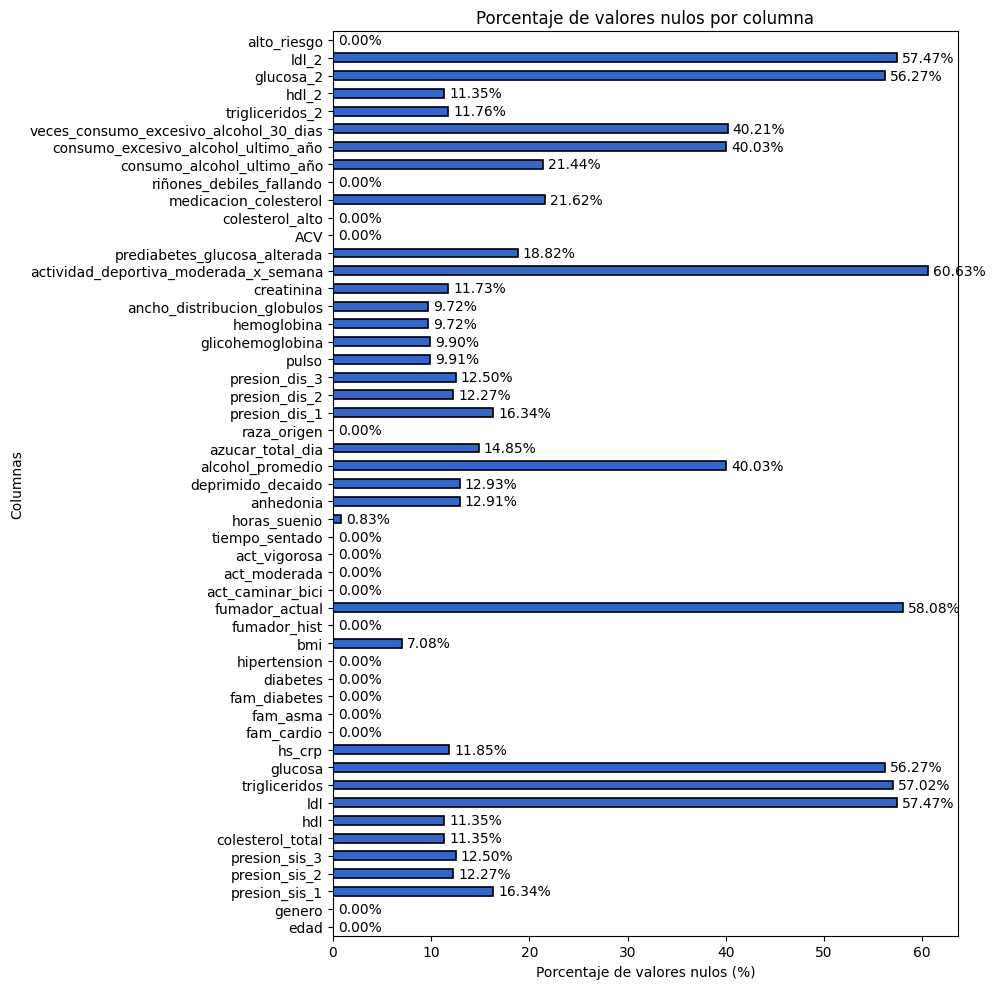

In [158]:
porcentaje_nulos = df_min.isna().mean().round(4) * 100

plt.figure(figsize=(10, 10))
porcentaje_nulos.plot(kind='barh', color="#3366CC", edgecolor='black', linewidth=1.2)

plt.title('Porcentaje de valores nulos por columna')
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Columnas')

for index, value in enumerate(porcentaje_nulos):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.tight_layout()
plt.show()

In [172]:
if 'LBXSGL' in df_clean.columns:
    print(f"¡Encontramos Glucosa General! Faltantes: {df_clean['LBXSGL'].isnull().sum()}")
    # Comparar con la de ayuno
    print(f"Faltantes en Glucosa Ayuno (LBXGLU): {df_clean['LBXGLU'].isnull().sum()}")
else:
    print("La variable LBXSGL no está en este archivo.")

¡Encontramos Glucosa General! Faltantes: 655
Faltantes en Glucosa Ayuno (LBXGLU): 3133


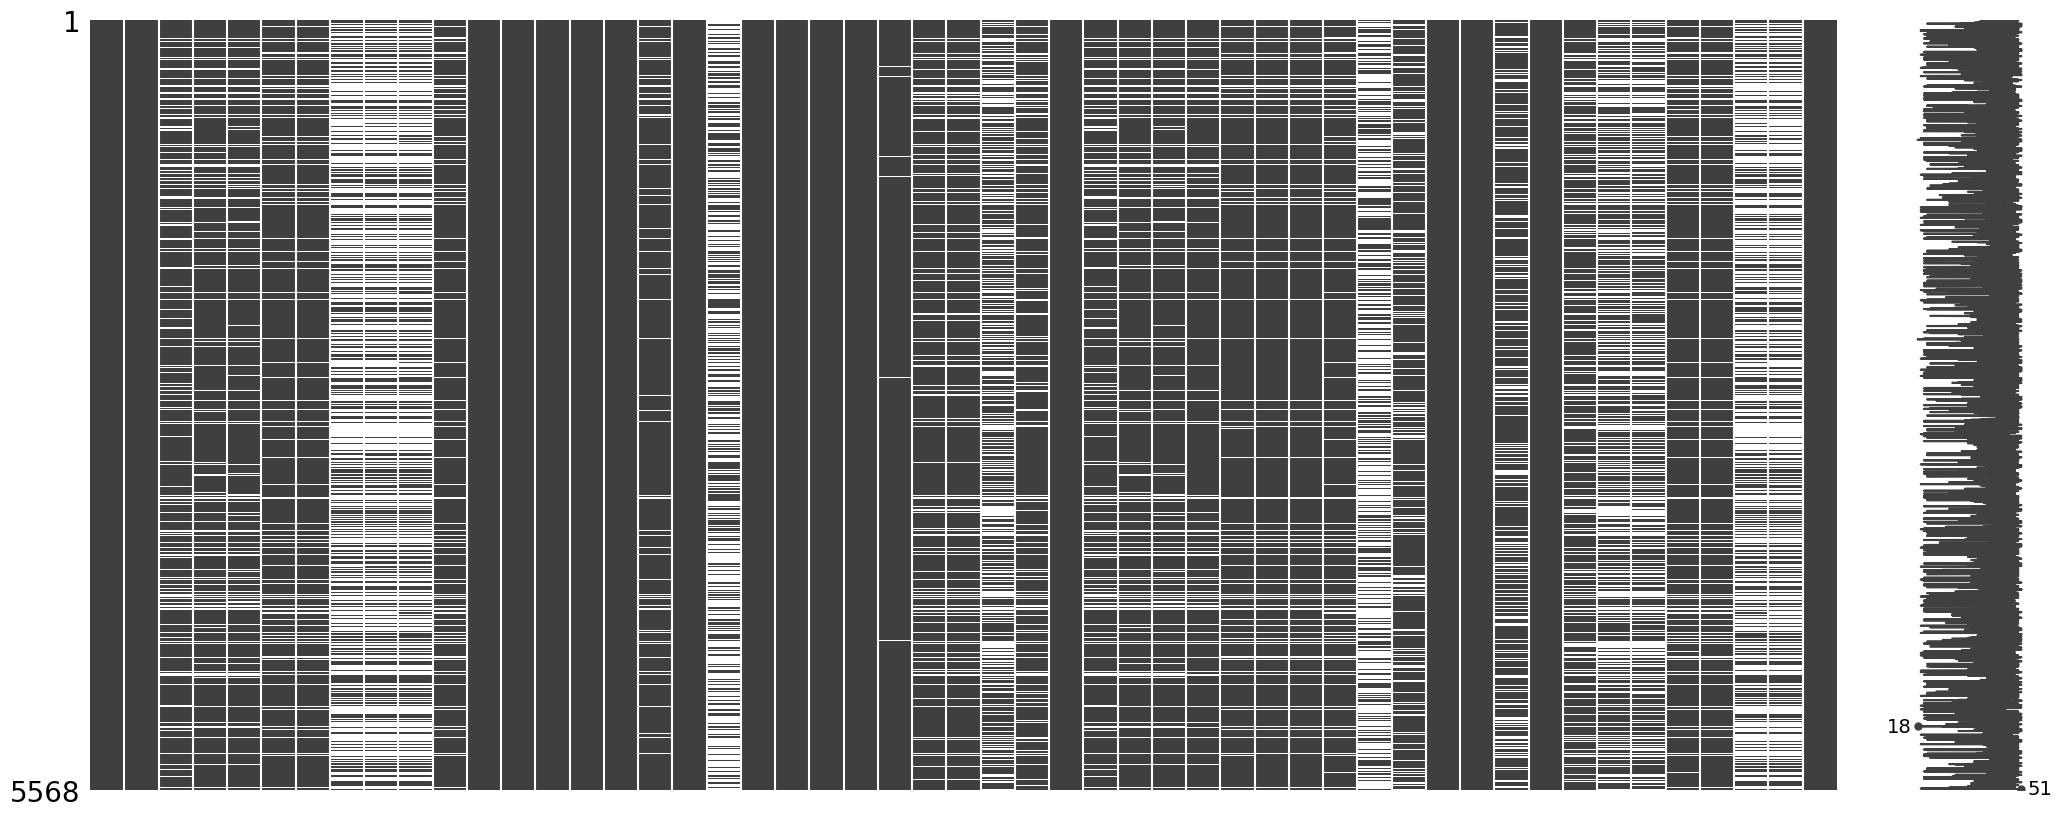

In [159]:
msno.matrix(df_min)
plt.show()

se pueden analizar algunas dependecias en los faltantes. Se analiza cada uno

Nombre de las variables con faltantes:
4. colesterol_total
5. hdl
6. ldl
7. trigliceridos
8. glucosa
9. hs_crp
10. bmi
11. fumador_actual
12. horas_suenio
13. anhedonia
14. deprimido_decaido
15. alcohol_promedio
16. azucar_total_dia
20. pulso
21. glicohemoglobina
22. hemoglobina
23. ancho_distribucion_globulos
24. creatinina
25. actividad_deportiva_moderada_x_semana
26. prediabetes_glucosa_alterada
27. medicacion_colesterol
28. consumo_alcohol_ultimo_año
29. consumo_excesivo_alcohol_ultimo_año
30. veces_consumo_excesivo_alcohol_30_dias

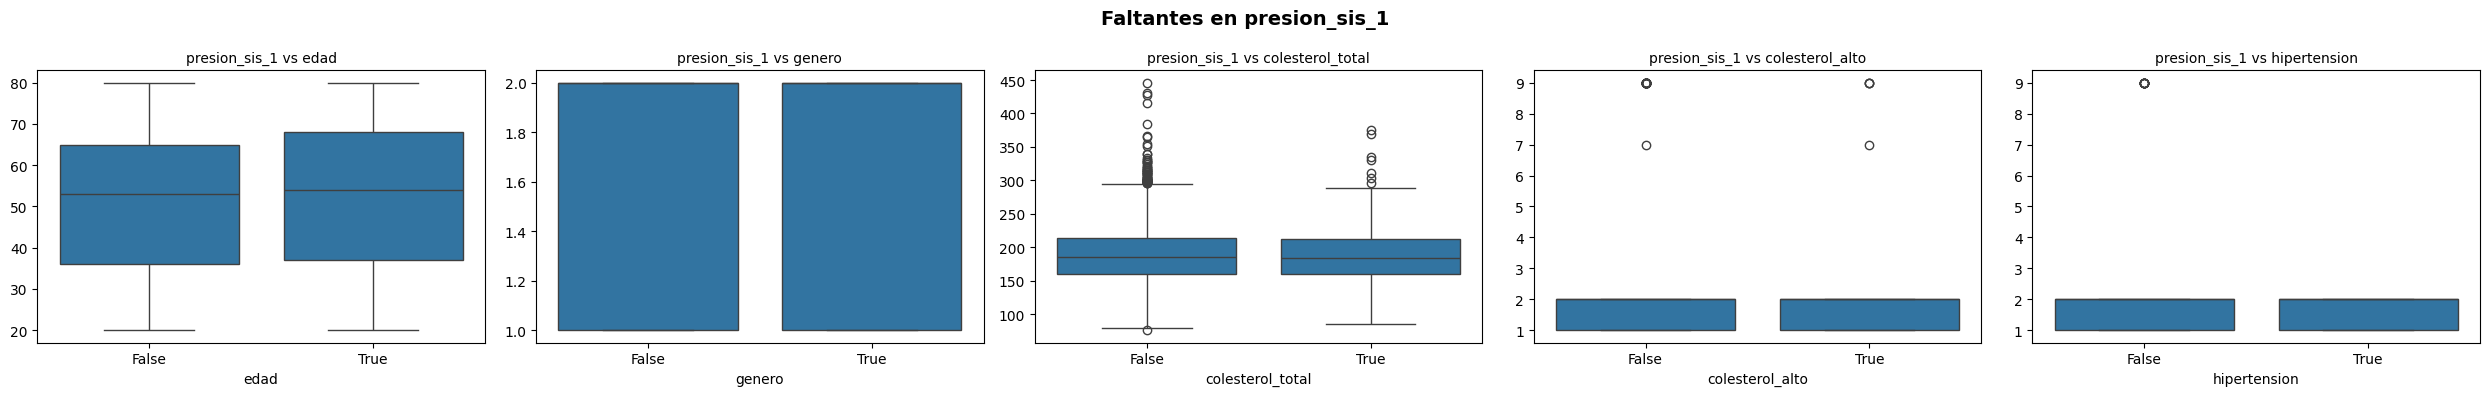

In [160]:
comparaciones = {
    'presion_sis_1': ['edad', 'genero', 'colesterol_total', 'colesterol_alto', 'hipertension'],
    # 'Cholesterol Level': ['Age', 'Exercise Habits', 'Sugar Consumption','BMI','Smoking'],
    # 'Smoking': ['Age','Gender', 'Stress Level', 'Alcohol Consumption'],
    # 'Exercise Habits': ['Age', 'Stress Level', 'BMI','Gender','Fasting Blood Sugar','Sleep Hours','Alcohol Consumption'],
    # 'BMI': ['Age', 'Gender', 'Exercise Habits'],
    # 'Triglyceride Level': ['Age', 'Cholesterol Level', 'Sugar Consumption'],
    # 'Fasting Blood Sugar': ['Age', 'Diabetes', 'BMI', 'Sugar Consumption'],
    # 'CRP Level': ['Age', 'Stress Level','Gender','Low HDL Cholesterol','High LDL Cholesterol','Cholesterol Level'],
    # 'Homocysteine Level': ['Age', 'Family Heart Disease','Low HDL Cholesterol','High LDL Cholesterol','Cholesterol Level'],
    # 'Sleep Hours': ['Age', 'Stress Level', 'Gender', 'Exercise Habits', 'Smoking'],
    # 'Family Heart Disease': ['Age', 'Gender', 'Diabetes'],
    # 'Diabetes': ['Age', 'BMI', 'Sugar Consumption', 'Gender', 'Smoking'],
    # # --
    # 'High Blood Pressure': ['Age', 'Blood Pressure', 'BMI', 'Gender', 'Blood Pressure'],
    # 'Low HDL Cholesterol': ['Age', 'BMI'],
    # 'High LDL Cholesterol': ['Age', 'BMI'],
    # 'Alcohol Consumption': ['Age', 'Gender', 'Smoking'],
    # 'Stress Level': ['Age', 'Gender'],
    # 'Sugar Consumption': ['Age', 'BMI', 'Exercise Habits']
}

for var, related_vars in comparaciones.items():
    df_min['is_missing'] = df_min[var].isnull()

    fig, axes = plt.subplots(1, len(related_vars), figsize=(5*len(related_vars), 4))
    fig.suptitle(f'Faltantes en {var}', fontsize=14, fontweight='bold')

    for j, comp in enumerate(related_vars):
        ax = axes[j] if len(related_vars) > 1 else axes
        if df_min[comp].dtype.name in ['category', 'object']:
            sns.countplot(data=df_min, x=comp, hue='is_missing', ax=ax)
        else:
            sns.boxplot(data=df_min, x='is_missing', y=comp, ax=ax)
        ax.set_title(f'{var} vs {comp}', fontsize=10)
        ax.set_xlabel(comp)
        ax.set_ylabel('')

    plt.tight_layout()
    plt.show()


### **Faltantes presión**

<Figure size 1000x600 with 0 Axes>

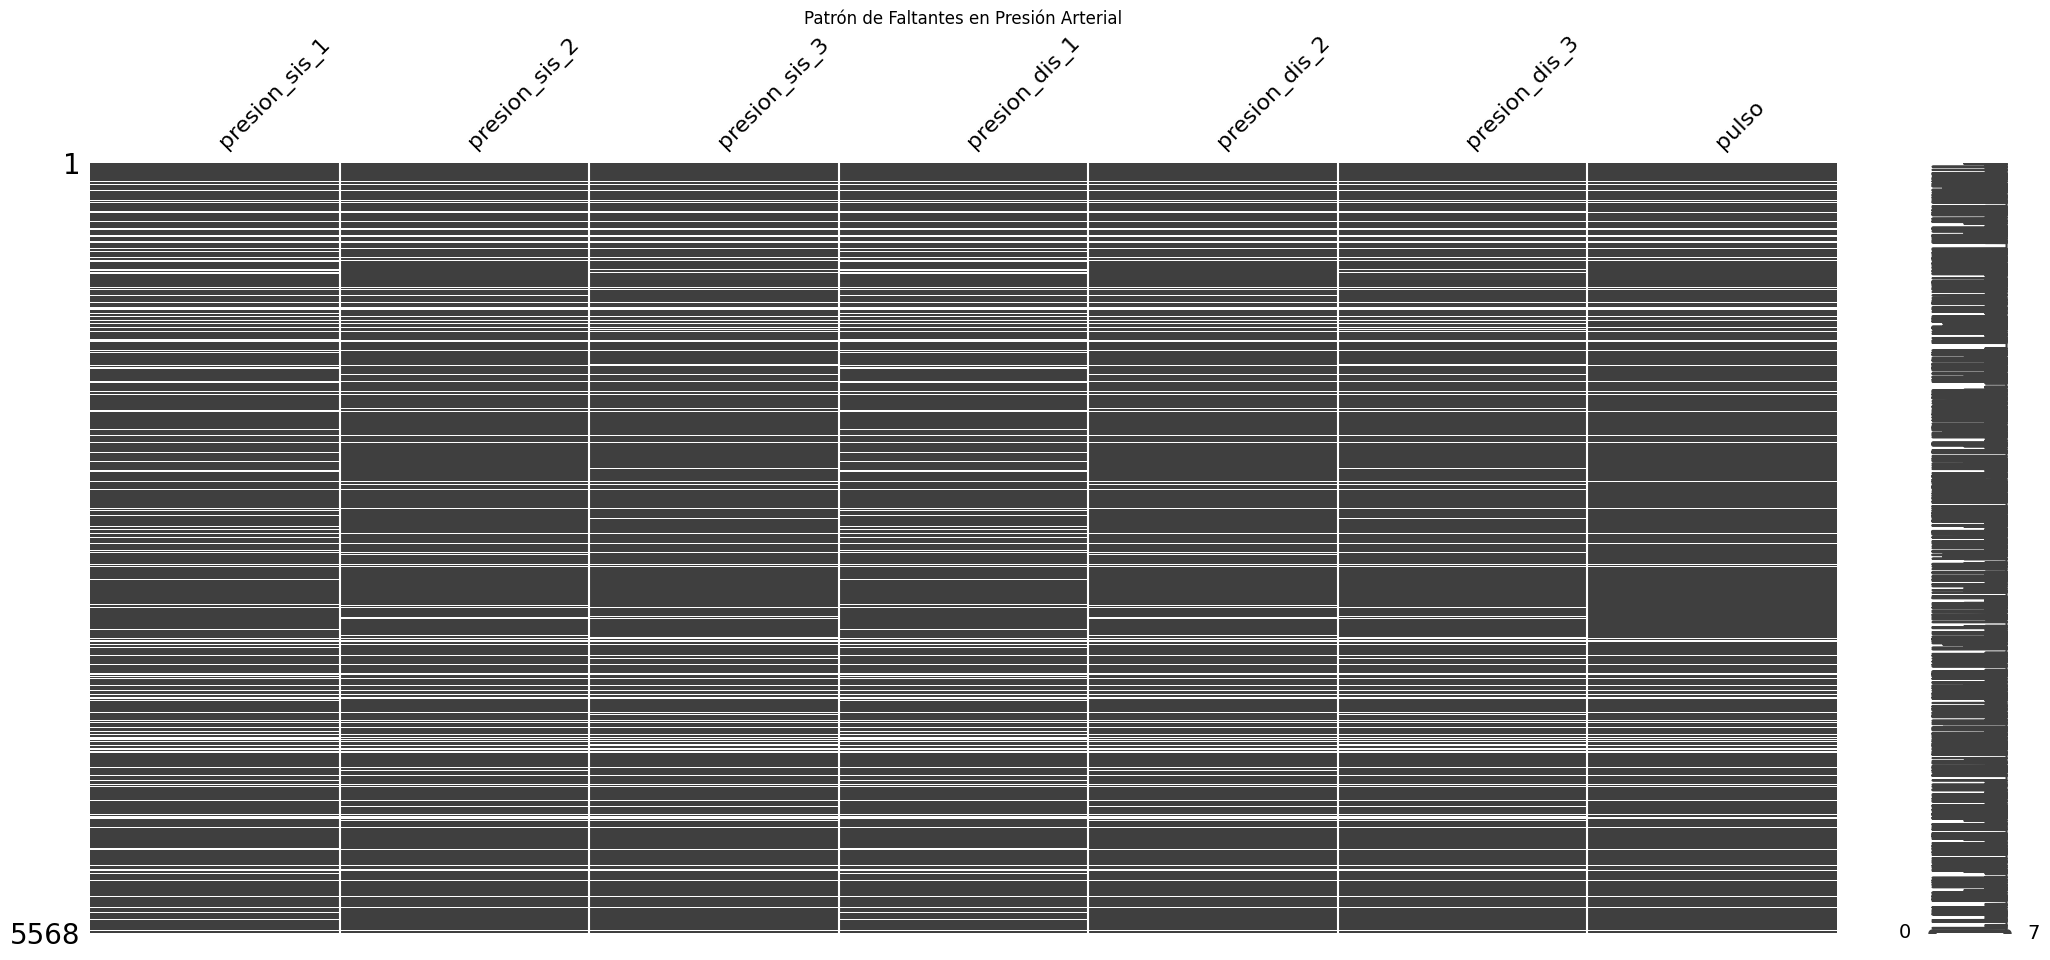

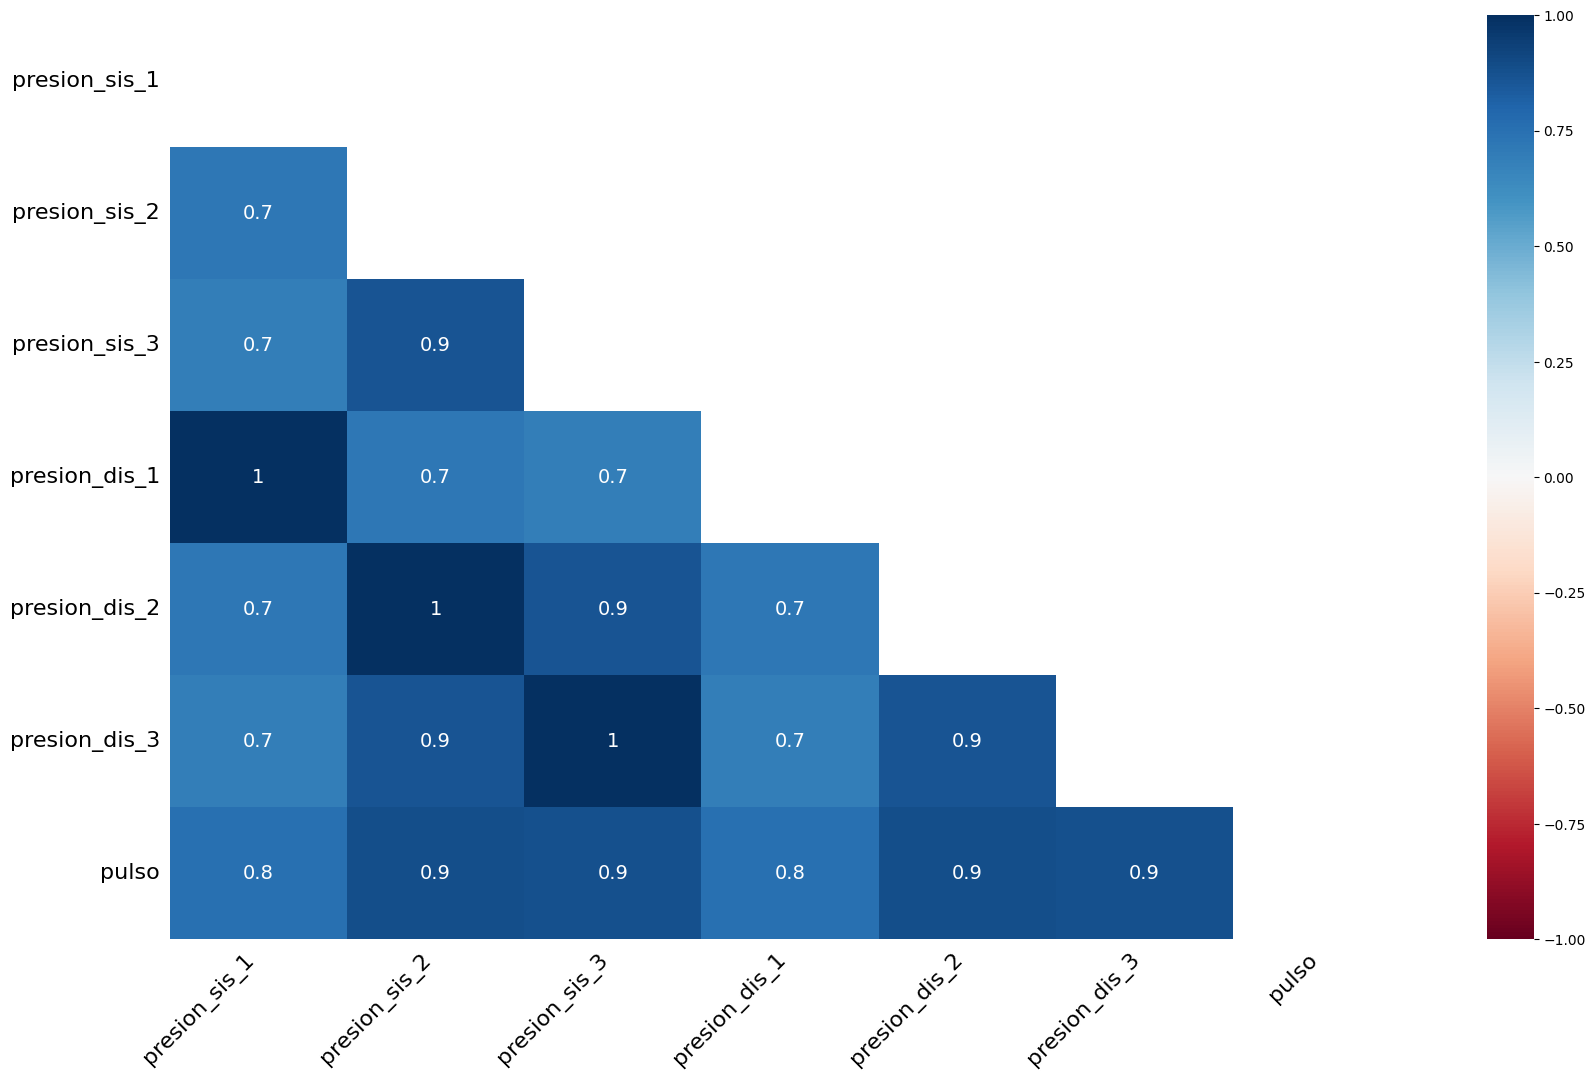

In [161]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Definimos las variables de presión
presion_vars = [
    'presion_sis_1', 'presion_sis_2', 'presion_sis_3',
    'presion_dis_1', 'presion_dis_2', 'presion_dis_3', 'pulso'
]

# 1. Visualizar el patrón de "bloque"
plt.figure(figsize=(10,6))
msno.matrix(df_min[presion_vars])
plt.title('Patrón de Faltantes en Presión Arterial')
plt.show()

# 2. Correlación de nulidad
# Un valor de 1.0 significa que si falta una, falta la otra (indica patrón MAR).
msno.heatmap(df_min[presion_vars])
plt.show()

In [162]:
# Si hay una diferencia significativa en la media de edad, es MAR confirmado.
print(df_min.groupby(df_min['presion_sis_1'].isnull())['edad'].mean())
print(df_min.groupby(df_min['presion_sis_1'].isnull())['genero'].mean())
print(df_min.groupby(df_min['presion_sis_1'].isnull())['bmi'].mean())



presion_sis_1
False    51.186131
True     53.117582
Name: edad, dtype: float64
presion_sis_1
False    1.510305
True     1.538462
Name: genero, dtype: float64
presion_sis_1
False    29.765384
True     30.568522
Name: bmi, dtype: float64


Existe alta correlación en los faltantes de presión. Faltan en bloque. Esto se puede dar en este dataset ya que a veces los pacientes no participan de todas las etapas que constituyen esta encuesta.

TIPO: MAR

laboratorios

<Axes: >

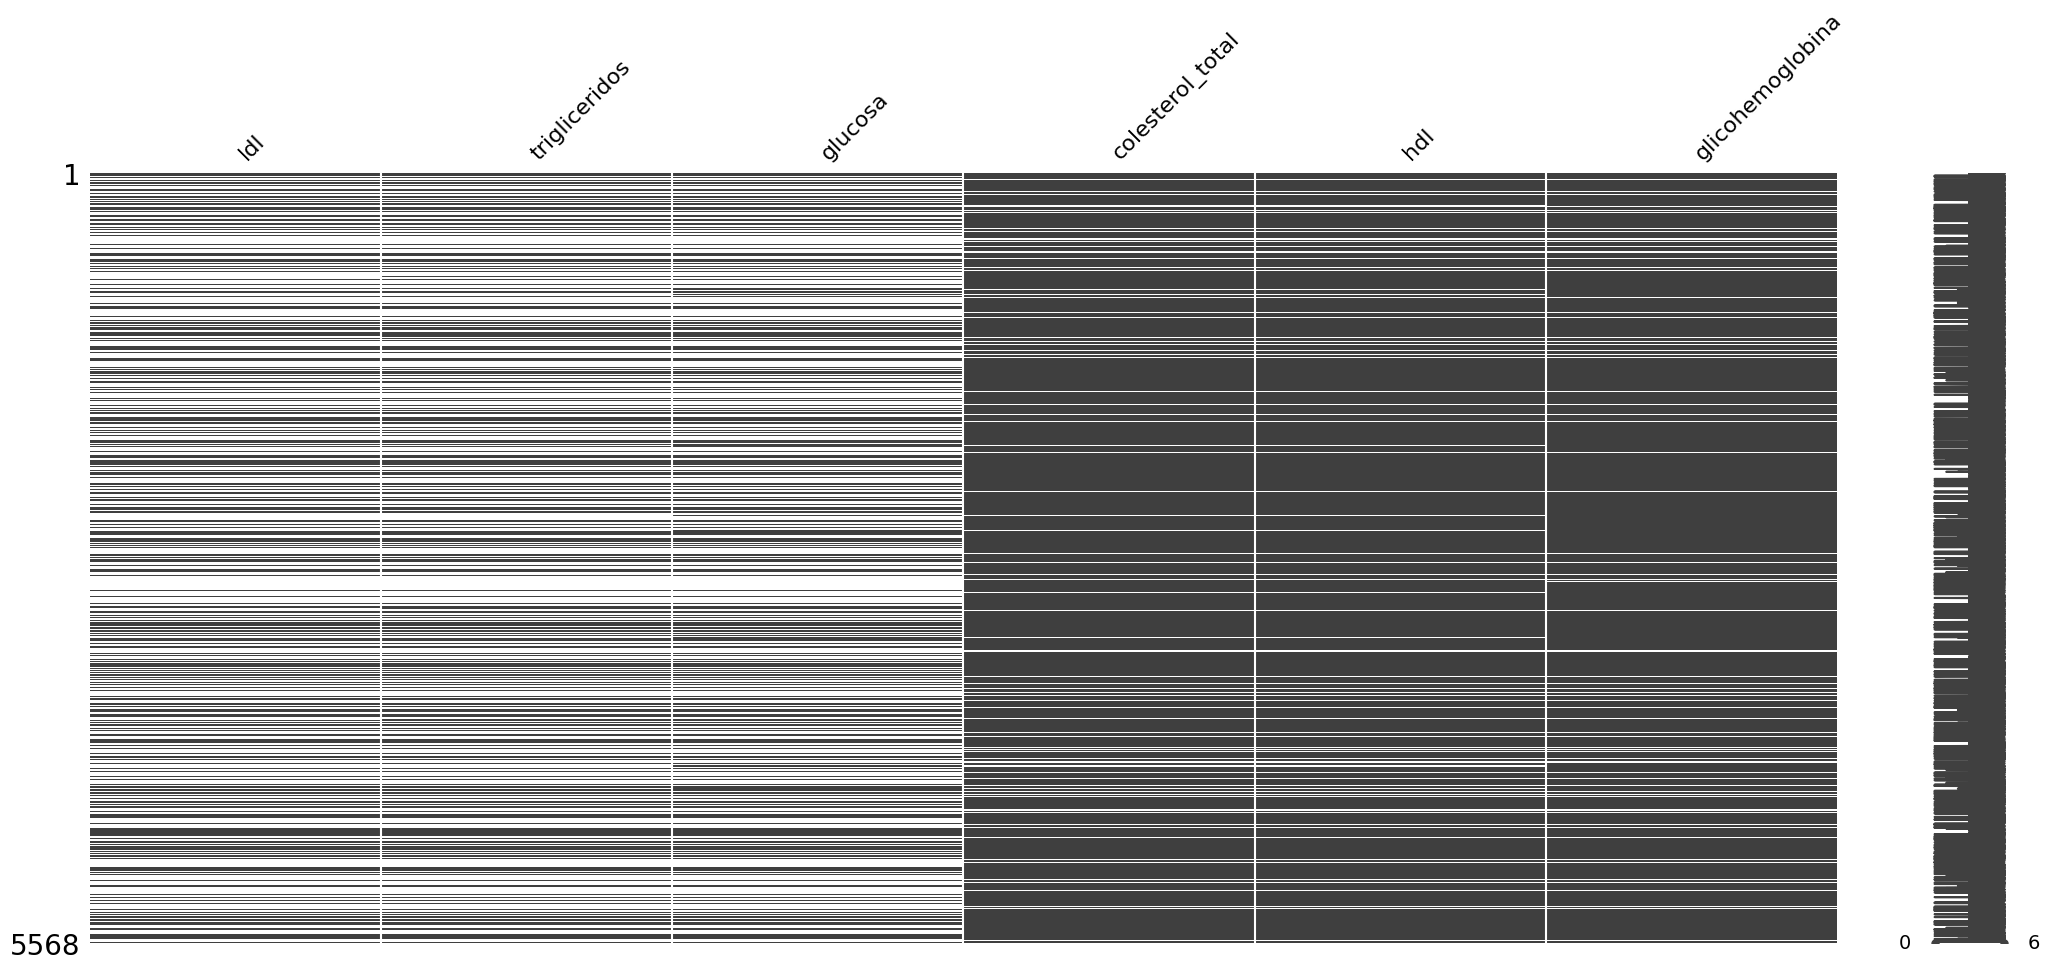

In [163]:
lab_vars = ['ldl', 'trigliceridos', 'glucosa', 'colesterol_total', 'hdl', 'glicohemoglobina']
msno.matrix(df_min[lab_vars])

In [164]:
# Crea una tabla de contingencia para ver si la falta de uno coincide con el otro
print(pd.crosstab(df_min['glucosa'].isnull(), df_min['trigliceridos'].isnull()))

trigliceridos  False  True 
glucosa                    
False           2393     42
True               0   3133


In [165]:
# Traemos la columna de pesos desde df_clean a df_min usando el índice
df_min['WTSAF2YR'] = df_clean['WTSAF2YR']

# Creamos la marca de si el paciente fue seleccionado para la submuestra de ayuno
# (Si el peso es > 0, fue seleccionado)
df_min['seleccionado_ayuno'] = df_min['WTSAF2YR'].fillna(0) > 0

# Realizamos la tabla de contingencia
verificacion_ayuno = pd.crosstab(
    df_min['seleccionado_ayuno'],
    df_min['glucosa'].isnull(),
    rownames=['¿Tiene peso de ayuno asignado?'],
    colnames=['¿La Glucosa es NaN?']
)

print("TABLA DE VERIFICACIÓN DE SUBMUESTRA (BLOQUE DE AYUNO)")
print("-" * 50)
print(verificacion_ayuno)

TABLA DE VERIFICACIÓN DE SUBMUESTRA (BLOQUE DE AYUNO)
--------------------------------------------------
¿La Glucosa es NaN?             False  True 
¿Tiene peso de ayuno asignado?              
False                             140   3133
True                             2295      0


El análisis de la estructura de datos reveló que las variables críticas de laboratorio (Glucosa, Triglicéridos y LDL) presentan un patrón de datos faltantes de tipo MAR (Missing at Random), con una ausencia de registros del 56% de la muestra. Esta condición no responde a un error de recolección, sino al diseño muestral de la encuesta NHANES. Específicamente, estas pruebas bioquímicas se restringen exclusivamente a la submuestra de ayuno matutino (Morning Fasting Subsample) por razones de protocolo clínico. Se validó que la falta de estos datos guarda una correlación casi perfecta con la ausencia de pesos estadísticos de ayuno (WTSAF2YR), confirmando que los pacientes no seleccionados para esta submuestra no poseen el dato por diseño del estudio.

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/GLU_J.htm

glucosa:https://wwwn.cdc.gov/nchs/data/nhanes/public/2017/labmethods/GLU-J-MET-508.pdf

https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/GLU_J.htm#LBDGLUSI

hdl: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/HDL_J.

trigliceridos - ldl: https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2017/DataFiles/TRIGLY_J.htm

In [166]:
# Si la correlación es 1.0, es exactamente el mismo dato en distinta unidad
print(df_clean[['LBXTR', 'LBDSTRSI']].corr())

             LBXTR  LBDSTRSI
LBXTR     1.000000  0.998812
LBDSTRSI  0.998812  1.000000


In [167]:
# 1. Comparamos los nulos de ambas
print(f"Faltantes en trigliceridos (LBXTR - mg/dL): {df_clean['LBXTR'].isnull().sum()}")
print(f"Faltantes en LBDSTRSI (mmol/L): {df_clean['LBDSTRSI'].isnull().sum()}")

# 2. Verificamos la correlación
# Si es 1.0, son la misma variable escalada
correlacion = df_clean['LBXTR'].corr(df_clean['LBDSTRSI'])
print(f"\nCorrelación entre ambas: {correlacion:.4f}")

# 3. Vemos si hay casos donde una está y la otra no
casos_recuperables = df_clean[df_clean['LBXTR'].isnull() & df_clean['LBDSTRSI'].notnull()].shape[0]
print(f"Casos donde LBDSTRSI podría 'salvar' a LBXTR: {casos_recuperables}")

Faltantes en trigliceridos (LBXTR - mg/dL): 3175
Faltantes en LBDSTRSI (mmol/L): 655

Correlación entre ambas: 0.9988
Casos donde LBDSTRSI podría 'salvar' a LBXTR: 2531


In [168]:
# # 1. Recuperamos los datos (Fórmula de conversión: mmol/L * 88.57 = mg/dL)
# df_min['trigliceridos'] = df_min['trigliceridos'].fillna(df_clean['LBDSTRSI'] * 88.57)

# # 2. Verificamos cuántos faltantes quedan ahora
# nuevos_faltantes = df_min['trigliceridos'].isnull().sum()
# print(f"Faltantes finales en trigliceridos: {nuevos_faltantes} (¡Bajamos de 3175 a {nuevos_faltantes}!)")

In [171]:
# 1. Identificar quiénes tienen solo la versión SI
solo_si = df_clean[df_clean['LBXGLU'].isnull() & df_clean['LBDGLUSI'].notnull()]

# 2. Identificar quiénes tienen ambas
ambas = df_clean[df_clean['LBXGLU'].notnull() & df_clean['LBDGLUSI'].notnull()]

# 3. Identificar quiénes no tienen ninguna (los verdaderos faltantes)
ninguna = df_clean[df_clean['LBXGLU'].isnull() & df_clean['LBDGLUSI'].isnull()]

print(f"Pacientes a rescatar (Solo tienen LBDGLUSI): {solo_si.shape[0]}")
print(f"Pacientes con datos en ambas columnas: {ambas.shape[0]}")
print(f"Pacientes sin datos en ninguna (Faltante Real): {ninguna.shape[0]}")

Pacientes a rescatar (Solo tienen LBDGLUSI): 0
Pacientes con datos en ambas columnas: 2435
Pacientes sin datos en ninguna (Faltante Real): 3133


| Variable | Tipo | % faltantes | Tipo de faltante | Imputación |
| --- | --- | --- | --- | --- |
| edad | num | No tiene |  |  |
| genero | num | No tiene |  |  |
| presion_sis_1 | num | 16,34% | MAR |  |
| presion_sis_2 | num | 12,27% | MAR |  |
| presion_sis_3 | num | 12,50% | MAR |  |
| colesterol_total |  |  |  |  |
| hdl |  |  |  |  |
| ldl |  |  |  |  |
| trigliceridos |  |  |  |  |
| glucosa |  |  |  |  |
| hs_crp |  |  |  |  |
| fam_cardio |  |  |  |  |
| fam_asma |  |  |  |  |
| fam_diabetes |  |  |  |  |
| diabetes |  |  |  |  |
| hipertension |  |  |  |  |
| bmi |  |  |  |  |
| fumador_hist |  |  |  |  |
| fumador_actual |  |  |  |  |
| act_caminar_bici |  |  |  |  |
| act_moderada |  |  |  |  |
| act_vigorosa |  |  |  |  |
| tiempo_sentado |  |  |  |  |
| horas_suenio |  |  |  |  |
| anhedonia |  |  |  |  |
| deprimido_decaido |  |  |  |  |
| alcohol_promedio |  |  |  |  |
| azucar_total_dia |  |  |  |  |
| raza_origen |  |  |  |  |
| presion_dis_1 | num | 16,34% | MAR |  |
| presion_dis_2 | num | 12,27% | MAR |  |
| presion_dis_3 | num | 12,50% | MAR |  |
| pulso |  |  |  |  |
| glicohemoglobina |  |  |  |  |
| hemoglobina |  |  |  |  |
| ancho_distribucion_globulos |  |  |  |  |
| creatinina |  |  |  |  |
| actividad_deportiva_moderada_x_semana |  |  |  |  |
| prediabetes_glucosa_alterada |  |  |  |  |
| ACV |  |  |  |  |
| colesterol_alto |  |  |  |  |
| medicacion_colesterol |  |  |  |  |
| riñones_debiles_fallando |  |  |  |  |
| consumo_alcohol_ultimo_año |  |  |  |  |
| consumo_excesivo_alcohol_ultimo_año |  |  |  |  |
| veces_consumo_excesivo_alcohol_30_dias |  |  |  |  |
| alto_riesgo |  |  |  |  |


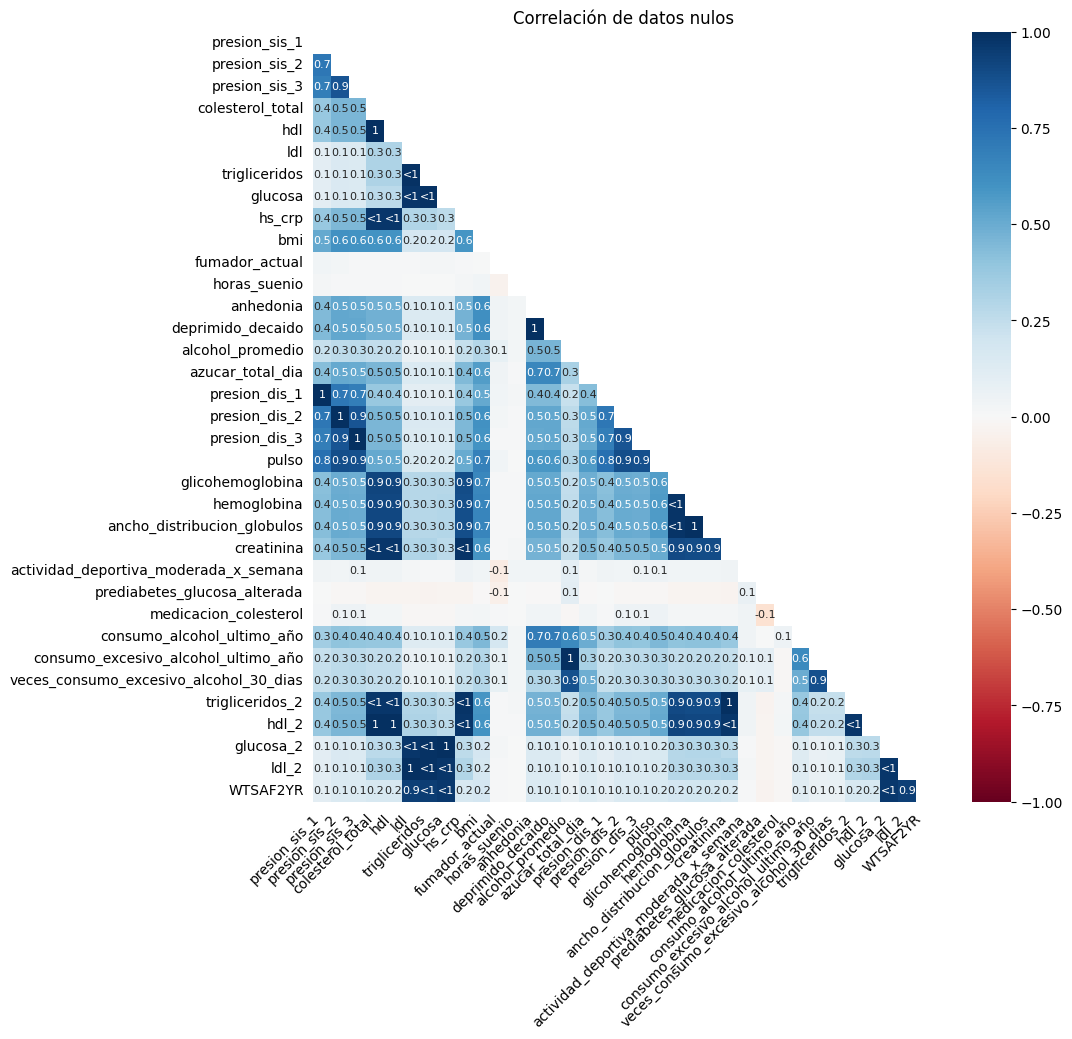

In [169]:
msno.heatmap(df_min, fontsize=10, figsize=(10,10))
plt.title("Correlación de datos nulos", fontsize=12)
plt.show()

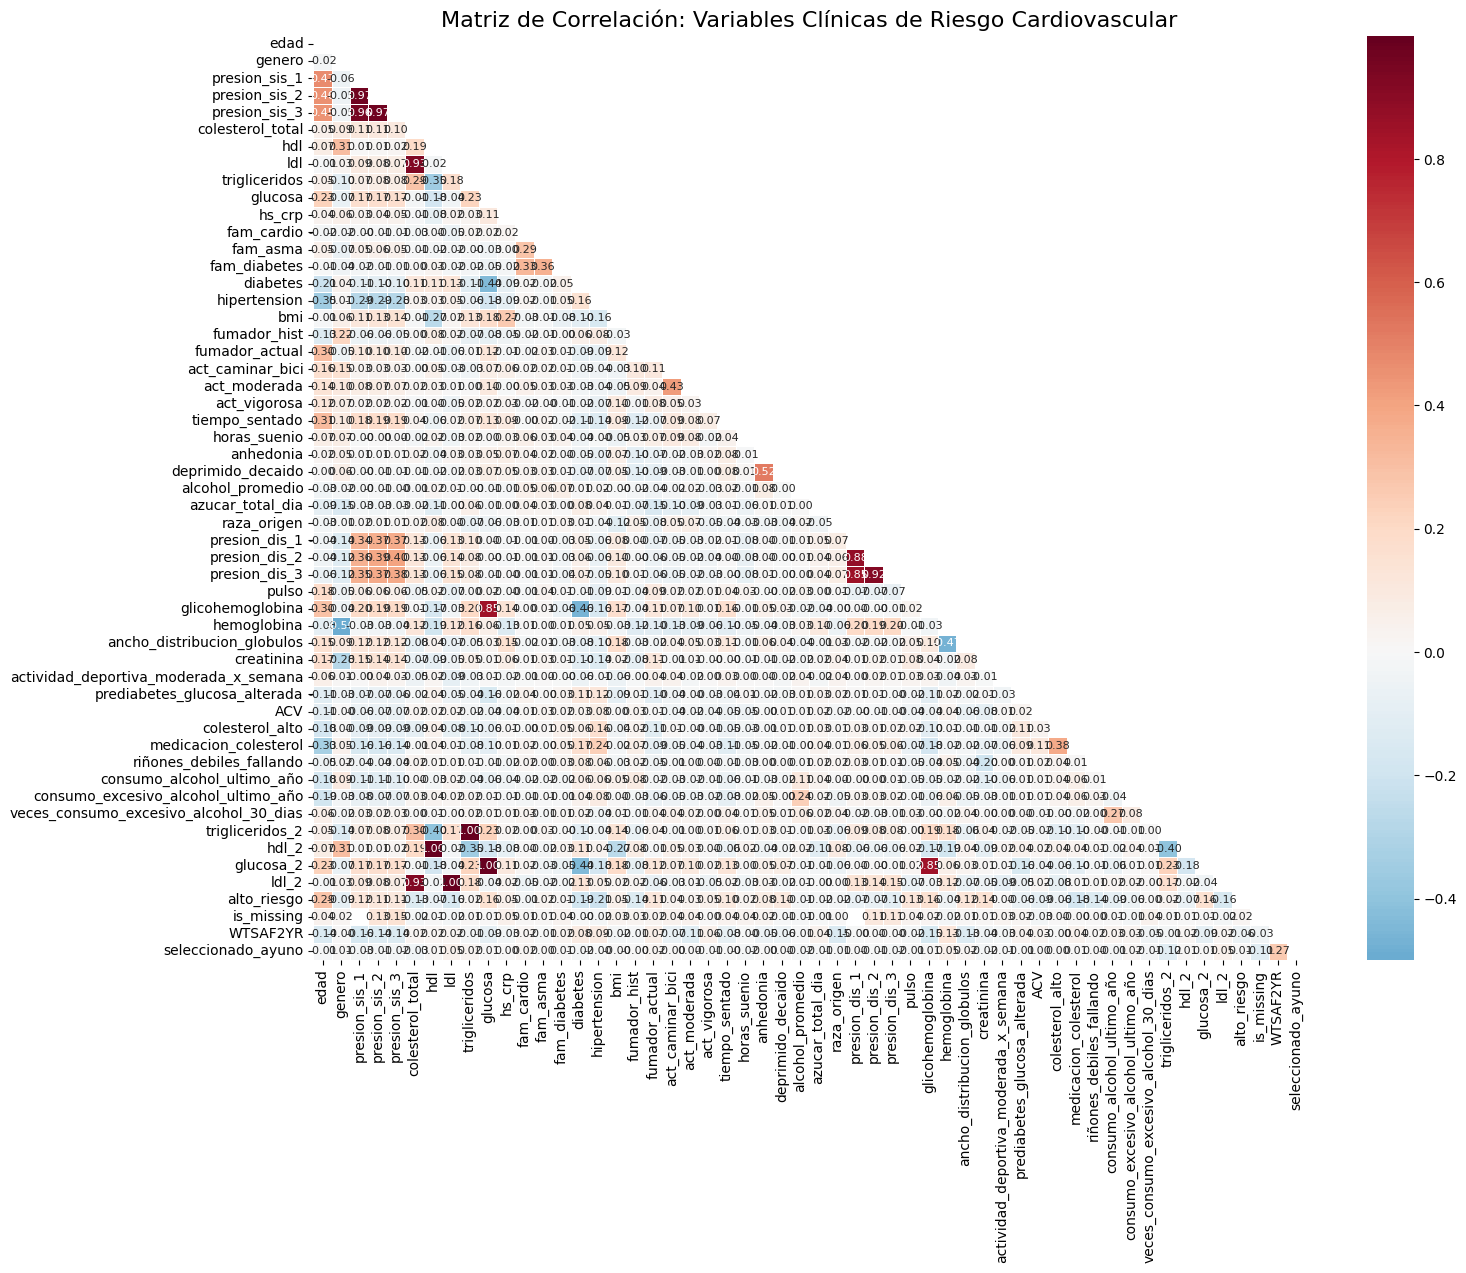

In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Calculamos la matriz de correlación (usamos Spearman si hay variables no normales)
corr_matrix = df_min.corr(method='pearson')

# 2. Configuramos el tamaño de la figura
plt.figure(figsize=(16, 12))

# 3. Creamos un mapa de calor (Heatmap)
# Usamos una máscara para ver solo la mitad inferior (espejada) y que sea más legible
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,           # Muestra los números
            fmt=".2f",            # Dos decimales
            cmap='RdBu_r',        # Rojo para positiva, Azul para negativa
            center=0,
            linewidths=0.5,
            annot_kws={"size": 8}) # Tamaño de letra de los números

plt.title('Matriz de Correlación: Variables Clínicas de Riesgo Cardiovascular', fontsize=16)
plt.show()